In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:

def GaussianMonteCarlo(num_samples, num_components, means, var):
    weights = np.ones(num_components) / num_components
    gmm_mc_samples = np.zeros((num_samples, len(means[0])))

    for i in range(num_samples):
        # Sample component index
        comp_idx = np.random.choice(num_components, p=weights)

        # Sample from selected component using normal distribution pdf
        sample = np.random.normal(loc=means[comp_idx], scale=var)
        gmm_mc_samples[i] = sample
    
    return gmm_mc_samples

def BivariateNormSamples(num_samples, num_components, means, var):
    covars = np.array([[[var, 0],[0, var]]] * num_components)
    
    biv_norm_samples = np.concatenate([
            np.random.multivariate_normal(means[k], covars[k], size=int(num_samples/num_components)) for k in range(num_components)
    ])
    
    return biv_norm_samples


In [21]:
# Define GMM parameters
samps = 800
comps = 8
variance = 0.02
gmm_means = np.array([(2 * np.cos((2 * np.pi * k)/comps), 2 * np.sin((2 * np.pi * k)/comps)) for k in range(comps)])

In [24]:
# Obtain samples from Monte Carlo method
gmm_mc_samples = GaussianMonteCarlo(samps, comps, gmm_means, variance)

# Obtain samples from Bivariate Normal distribution
biv_norm_samples = BivariateNormSamples(800, 8, gmm_means, variance)

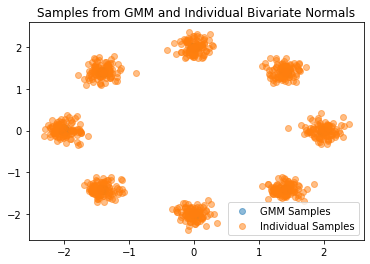

In [25]:
gmm_mc_samples
